In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\kanhu\OneDrive\Documents\data files\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


***Box Plot***

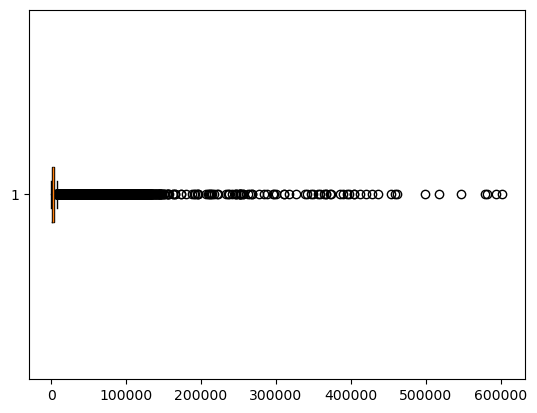

In [3]:
plt.boxplot(visa_df['no_of_employees'],vert=False)
plt.show()

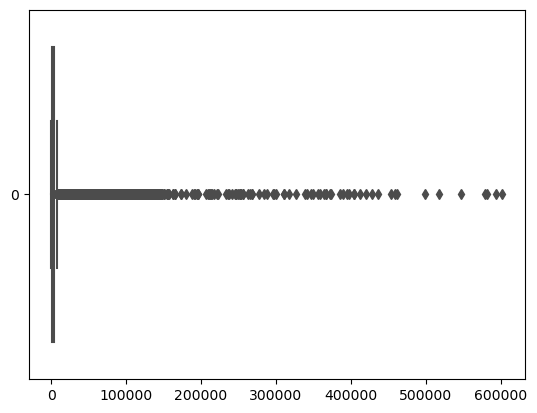

In [4]:
sns.boxplot(visa_df['no_of_employees'],orient='h',color='red')
plt.show()

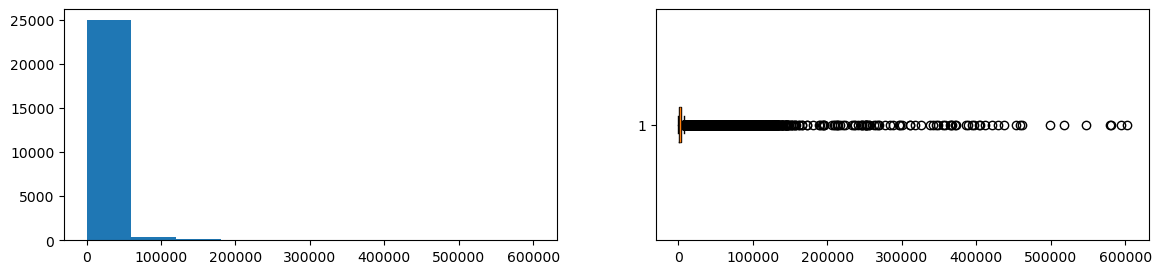

In [5]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,2).boxplot(visa_df['no_of_employees'],vert=False)
plt.show()

***Outlier Data***

In [9]:
Q1 = round(np.quantile(visa_df['no_of_employees'],0.25),2)
Q3 = round(np.quantile(visa_df['no_of_employees'],0.75),2)
IQR = Q3 - Q1
LB = Q1 - 1.5 *IQR
UB = Q3 + 1.5 *IQR
con1 = visa_df['no_of_employees'] < LB
con2 = visa_df['no_of_employees'] > UB
outlier_data = visa_df[con1 | con2]
len(outlier_data)

1556

***Non Outlier Data***

In [8]:
Q1 = round(np.quantile(visa_df['no_of_employees'],0.25),2)
Q3 = round(np.quantile(visa_df['no_of_employees'],0.75),2)
IQR = Q3 - Q1
LB = Q1 - 1.5 *IQR
UB = Q3 + 1.5 *IQR
con3 = visa_df['no_of_employees'] > LB
con4 = visa_df['no_of_employees'] < UB
non_outlier_data = visa_df[con3 & con4]
len(non_outlier_data)

23924

In [32]:
len(visa_df['no_of_employees'])

25480

***Histogram and boxplot for non outliers data***

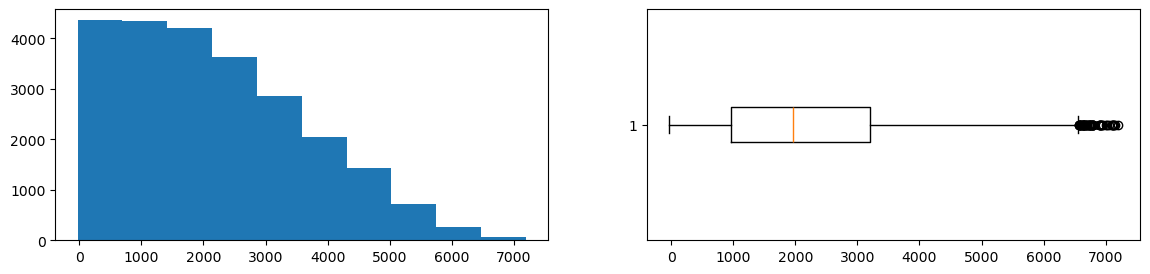

In [10]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(non_outlier_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outlier_data['no_of_employees'],vert=False)
plt.show()

***Comparing Total data with non outliers data***

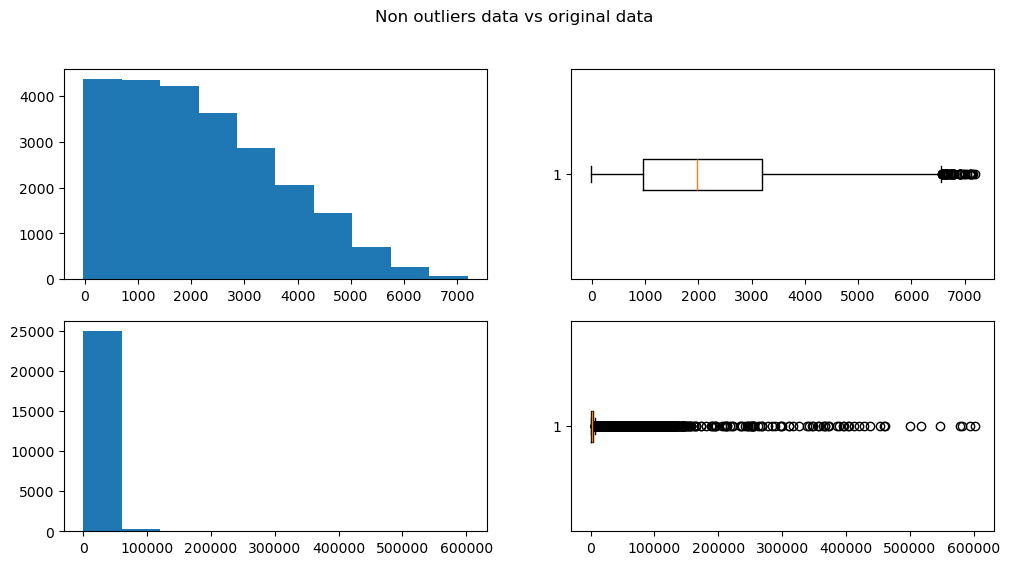

In [11]:
plt.figure(figsize=(12,6))
plt.suptitle('Non outliers data vs original data')
plt.subplot(2,2,1).hist(non_outlier_data['no_of_employees'])
plt.subplot(2,2,2).boxplot(non_outlier_data['no_of_employees'],vert=False)
plt.subplot(2,2,3).hist(visa_df['no_of_employees'])
plt.subplot(2,2,4).boxplot(visa_df['no_of_employees'],vert=False)
plt.show()

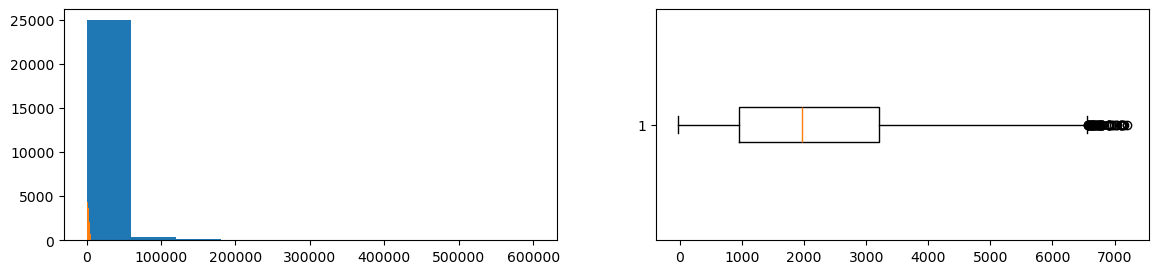

In [12]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1).hist(visa_df['no_of_employees'])
plt.subplot(1,2,1).hist(non_outlier_data['no_of_employees'])
plt.subplot(1,2,2).boxplot(non_outlier_data['no_of_employees'],vert=False)
plt.show()

***How to deal the outliers***

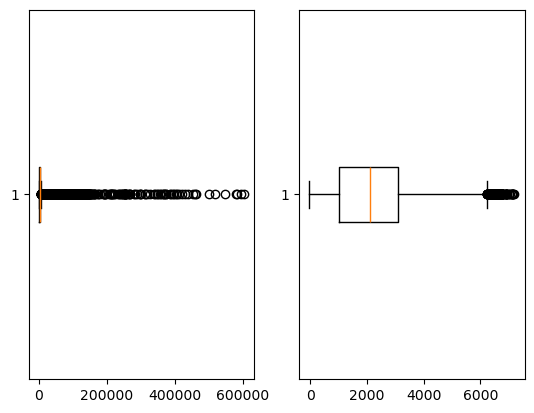

In [13]:
list1 = []
median = visa_df['no_of_employees'].median()
Q1 = round(np.quantile(visa_df['no_of_employees'],0.25),2)
Q3 = round(np.quantile(visa_df['no_of_employees'],0.75),2)
IQR = Q3 - Q1
LB = Q1 - 1.5 *IQR
UB = Q3 + 1.5 *IQR
for value in visa_df['no_of_employees'].values:
    if value < LB or value > UB:
        list1.append(median)
    else:
        list1.append(value)
visa_df_copy = visa_df.copy()
visa_df_copy['no_of_employees'] = list1
plt.subplot(1,2,1).boxplot(visa_df['no_of_employees'],vert=False)
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'],vert=False)
plt.show()

***np.where***

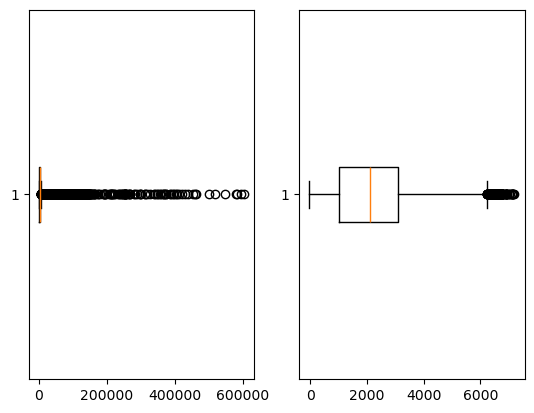

In [14]:
con1 = visa_df['no_of_employees'] < LB
con2 = visa_df['no_of_employees'] > UB
con = con1 | con2
new_data = np.where(con,median,visa_df['no_of_employees'])
visa_df_copy=visa_df.copy()
visa_df_copy['no_of_employees']=new_data
plt.subplot(1,2,1).boxplot(visa_df['no_of_employees'],vert=False)
plt.subplot(1,2,2).boxplot(visa_df_copy['no_of_employees'],vert=False)
plt.show()